In [15]:
## 1.1 Evaluate the Accuracy of Service Metric Estimation
'''
Linear regression is a method that assume there is a linear relation between Y (service metrics) and X (device statistics). If X has n features then we can write the linear relation as following:

\begin{equation*}
Y = w_1*x_1+w_2*x_2+...+b
\end{equation*}
where W is the weights vector and b is the bias. The example 1 shows a simple implementation of linear regression. Example 1 shows how we use linear regression to fit a linear model to our dataset. 

In this part you need to change examples in a way that:

1) Use linear regression to train a model M with the training set. Provide coefficients $(w_1, w_2, ...)$ and bias b of your model M.

2) To assess the accuracy of the estimate error of M over test set. We define the estimate error as the Normalized Mean Absolute Error (NMAE) which is defined as $\frac{1}{\bar{y}}(\frac{1}{m}\sum\limits_{i=1}^{m}|y_i-\hat{y}_i|)$, where $\hat{y}_i$ is the model estimation for the measured service metrics $y_i$, and $\bar{y}$ is the average of the observations $y_i$ of the test set, which is size of m=1080 [1]. Note that $\hat{y}_i=M(y_i)$. As a baseline for M, use a $naive$ method which relies on Y values only. For each x in X it predicts a constant value $\bar{y}$ which is the sample mean of samples $y_i$ in training set. Compute $\bar{y}$ for the naive method for the training set and compute the NMAE for the test set.

3) Produce a time series plot that shows both the measurements and the model estimation for M for the Video Frame Rate values in the test set (see example of such a plot in Figure 4(a) of [1]). Show also the prediction of the naive method.

4) Produce a density plot and a histogram for the Video Frame Rate values in the test set. Set the bin size of the histogram to 1 frame. 

5) Produce a density plot for the prediction error $y_i-\hat{y}_i$ in the test set.

6) Based on the above figure and graphs, discuss the accuracy of estimating the Video Frame Rate.

'''

'\nLinear regression is a method that assume there is a linear relation between Y (service metrics) and X (device statistics). If X has n features then we can write the linear relation as following:\n\n\x08egin{equation*}\nY = w_1*x_1+w_2*x_2+...+b\n\\end{equation*}\nwhere W is the weights vector and b is the bias. The example 1 shows a simple implementation of linear regression. Example 1 shows how we use linear regression to fit a linear model to our dataset. \n\nIn this part you need to change examples in a way that:\n\n1) Use linear regression to train a model M with the training set. Provide coefficients $(w_1, w_2, ...)$ and bias b of your model M.\n\n2) To assess the accuracy of the estimate error of M over test set. We define the estimate error as the Normalized Mean Absolute Error (NMAE) which is defined as $\x0crac{1}{\x08ar{y}}(\x0crac{1}{m}\\sum\\limits_{i=1}^{m}|y_i-\\hat{y}_i|)$, where $\\hat{y}_i$ is the model estimation for the measured service metrics $y_i$, and $\x08a

In [16]:
# Read external data into the program


In [2]:
# Producing training set and test set
import pandas as pd

# Read X,Y traces into pandas DataFrames named X,Y
X = pd.read_csv('X.csv')
Y = pd.read_csv('Y.csv')

# Here is how you can create a single frame with selected columns

X_features = ['runq-sz', '%%memused','proc/s','cswch/s','all_%%usr','ldavg-1','totsck','pgfree/s','plist-sz','file-nr','idel/s','tps']
XY = pd.concat([X[X_features], Y['DispFrames']], axis=1)


# Split XY into training set and test set of equal size

from sklearn.model_selection import train_test_split
train, test = train_test_split(XY, test_size = 0.3)

# Sort the train and test sets after index (which became unsorted through sampling)
train = train.sort_index(axis=0)
test = test.sort_index(axis=0)

# Extract X,Y components from test and train sets
X_train = train[X_features]; X_test = test[X_features]
Y_train = train['DispFrames']; Y_test = test['DispFrames']

In [3]:
# Computing and evaluating a linear model

import numpy as np

from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(X_train, Y_train)

# Print the model coefficients
np.set_printoptions(precision=2)
print("Coefficients:", regr.coef_)
print("Intercept:", regr.intercept_)
pred=regr.predict(X_test)

# Calculate the naive estimation
naive_est=np.mean(Y_train)
naive=np.linspace(1,Y_test.shape[0],Y_test.shape[0])
for i in range(Y_test.shape[0]):
    naive[i]=naive_est

# Compute the Normalized Mean Absolute Error (NMAE) of the model over the test set
NMAE = np.mean(np.abs(regr.predict(X_test) - Y_test))/np.mean(Y_test)
NMAE_n = np.mean(np.abs(naive_est - Y_test))/np.mean(Y_test)
print("Normalized Mean Absolute Error (NMAE) of the linear model is %.2f" %NMAE)
print("Normalized Mean Absolute Error (NMAE) of the naive estimation %.2f" %NMAE_n)

Coefficients: [-3.22e-02 -6.39e-02  7.68e-03 -1.95e-04  1.29e-01 -9.20e-03  1.00e-02
 -1.22e-05 -7.91e-03  2.68e-03 -7.03e-05  2.30e-03]
Intercept: 18.74532237274755
Normalized Mean Absolute Error (NMAE) of the linear model is 0.09
Normalized Mean Absolute Error (NMAE) of the naive estimation 0.23


In [4]:
Y_test

1       13.000000
2       13.820000
3       16.230000
6       13.000000
14      24.000000
          ...    
3578    17.280001
3581    26.079999
3583    21.460001
3591    25.539999
3592    18.309999
Name: DispFrames, Length: 1080, dtype: float64

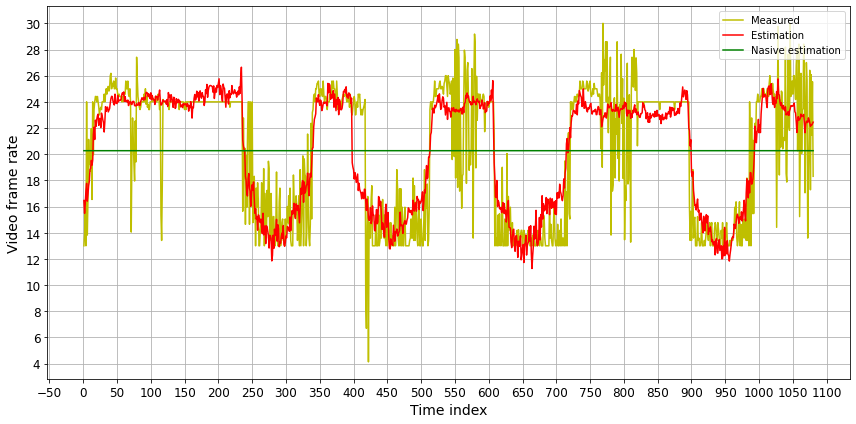

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

# Generate a figure with one subplot 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

# Produce the plots for specified features sets
index=np.linspace(1,Y_test.shape[0],Y_test.shape[0])
plt.plot(index, Y_test,  color='y')
plt.plot(index, regr.predict(X_test), color='r')
plt.plot(index, naive,  color='g')
#plt.plot(Y_test,  color='y')
#plt.plot(regr.predict(X_test), color='r')
x_major_locator=MultipleLocator(50)
y_major_locator=MultipleLocator(2)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
axes.grid(True)

# Customizing plot (changing font size, labels)
font_size = 14
plt.xlabel('Time index', fontsize=font_size)
plt.ylabel('Video frame rate', fontsize=font_size)
plt.legend(('Measured','Estimation','Nasive estimation'), loc = 'upper right', shadow=False, fancybox=True, fontsize=font_size-4)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
plt.tight_layout()
plt.savefig(r"\kth course\network analytics\project\pic\2.1.3.png",dpi=300)
plt.show()


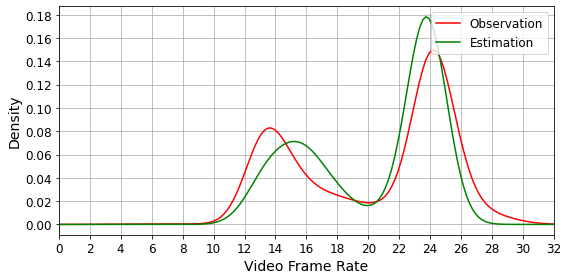

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

pre = regr.predict(X_test)-Y_test+Y_test
Y_test.plot.kde(ax=axes,ind=np.linspace(0,40,200),color='r');
pre.plot.kde(ax=axes,ind=np.linspace(0,40,200),color='g')
font_size = 14
plt.legend(('Observation','Estimation'), loc = 'upper right', shadow=False, fancybox=True, fontsize=font_size-2)
axes.set_xlabel('Video Frame Rate', fontsize=font_size)
axes.set_ylabel('Density', fontsize=font_size)
axes.tick_params(axis='both', which='major', labelsize=font_size-2)
axes.tick_params(axis='both', which='minor', labelsize=font_size-4)
x_major_locator=MultipleLocator(2)
y_major_locator=MultipleLocator(0.02)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
axes.grid(True)
plt.xlim([0,32])
plt.tight_layout()
plt.savefig(r"\kth course\network analytics\project\pic\2.1.4_d.png",dpi=300)
plt.show()

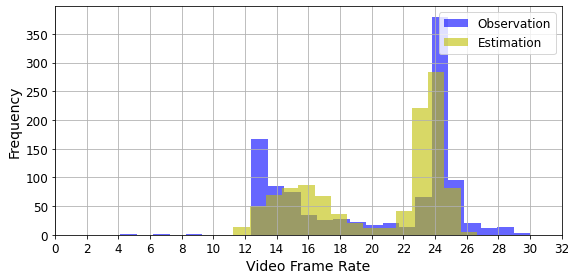

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
#plt.style.use('seaborn-deep')
# Histogram plot
n_bins1 = int(Y_test.max()-Y_test.min())
n_bins2 = int(pre.max()-pre.min())
axes.hist(Y_test,bins=n_bins1,color='b', alpha=0.6)
axes.hist(pre,bins=n_bins2,color='y', alpha=0.6)
# Customizing plot (changing font size, labels)
font_size = 14
plt.legend(('Observation','Estimation'), loc = 'upper right', shadow=False, fancybox=True, fontsize=font_size-2)
axes.set_xlabel('Video Frame Rate', fontsize=font_size)
axes.set_ylabel('Frequency', fontsize=font_size)
axes.tick_params(axis='both', which='major', labelsize=font_size-2)
axes.tick_params(axis='both', which='minor', labelsize=font_size-4)
plt.tight_layout()

x_major_locator=MultipleLocator(2)
y_major_locator=MultipleLocator(50)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim([0,32])
axes.grid(True)
plt.savefig(r"\kth course\network analytics\project\pic\2.1.4_h.png",dpi=300)
plt.show()

In [14]:
pre

1       16.379602
3       16.155389
4       16.322939
11      17.385560
16      17.236829
          ...    
3580    22.186214
3582    22.231371
3585    22.351020
3591    22.197263
3592    22.336450
Name: DispFrames, Length: 1080, dtype: float64

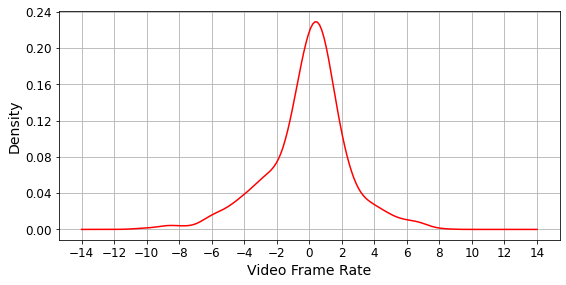

In [35]:
error = Y_test-regr.predict(X_test)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

error.plot.kde(ax=axes,ind=np.linspace(-14,14,200),color='r');
font_size = 14
axes.set_xlabel('Video Frame Rate', fontsize=font_size)
axes.set_ylabel('Density', fontsize=font_size)
axes.tick_params(axis='both', which='major', labelsize=font_size-2)
axes.tick_params(axis='both', which='minor', labelsize=font_size-4)
plt.tight_layout()

x_major_locator=MultipleLocator(2)
y_major_locator=MultipleLocator(0.04)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
axes.grid(True)
plt.savefig(r"\kth course\network analytics\project\pic\2.1.5.png",dpi=300)
plt.show()

<ipython-input-48-e0f978b9b07a>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  NMAE50 = pd.Series(index=range(0,50))


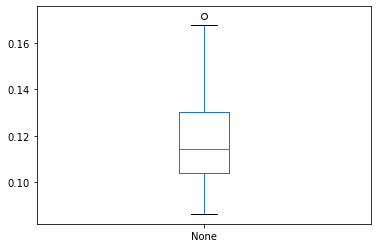

In [48]:
import matplotlib.pyplot as plt
NMAE50 = pd.Series(index=range(0,50))
train_size=50.0
test_size=1000.0
X_features = ['runq-sz', '%%memused','proc/s','cswch/s','all_%%usr','ldavg-1','totsck','pgfree/s','plist-sz','file-nr','idel/s','tps']
for i in range(0, 50):
    # Split X,Y into training set and test set
    train, test1 = train_test_split(XY, test_size = (3600.-train_size)/3600.)
    useless, test2 = train_test_split(test1, test_size = test_size/(3600.-train_size))
    # Split train and test sets into X,Y components
    X_train = train[X_features];X_test = test2[X_features]
    Y_train = train['DispFrames']; Y_test = test2['DispFrames']

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, Y_train)

    # Compute MSE 
    NMAE50[i] = np.mean(np.abs(regr.predict(X_test) - Y_test))/np.mean(Y_test)
    
    
# Show the distribution of the MSE values
NMAE50.plot.box(); 
plt.show()

<ipython-input-49-df7816bade51>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  NMAE100 = pd.Series(index=range(0,50))


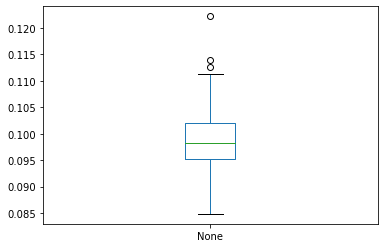

In [49]:
NMAE100 = pd.Series(index=range(0,50))
train_size=100.0
test_size=1000.0
X_features = ['runq-sz', '%%memused','proc/s','cswch/s','all_%%usr','ldavg-1','totsck','pgfree/s','plist-sz','file-nr','idel/s','tps']
for i in range(0, 50):
    # Split X,Y into training set and test set
    train, test1 = train_test_split(XY, test_size = (3600.-train_size)/3600.)
    useless, test2 = train_test_split(test1, test_size = test_size/(3600.-train_size))
    # Split train and test sets into X,Y components
    X_train = train[X_features];X_test = test2[X_features]
    Y_train = train['DispFrames']; Y_test = test2['DispFrames']

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, Y_train)

    # Compute MSE 
    NMAE100[i] = np.mean(np.abs(regr.predict(X_test) - Y_test))/np.mean(Y_test)
    
    
# Show the distribution of the MSE values
NMAE100.plot.box(); 
plt.show()

<ipython-input-50-ecde49e50fb0>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  NMAE200 = pd.Series(index=range(0,50))


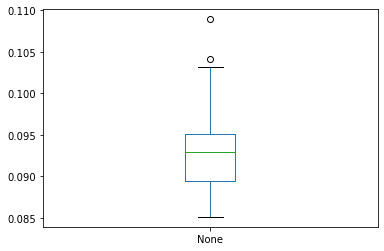

In [50]:
NMAE200 = pd.Series(index=range(0,50))
train_size=200.0
test_size=1000.0
X_features = ['runq-sz', '%%memused','proc/s','cswch/s','all_%%usr','ldavg-1','totsck','pgfree/s','plist-sz','file-nr','idel/s','tps']
for i in range(0, 50):
    # Split X,Y into training set and test set
    train, test1 = train_test_split(XY, test_size = (3600.-train_size)/3600.)
    useless, test2 = train_test_split(test1, test_size = test_size/(3600.-train_size))
    # Split train and test sets into X,Y components
    X_train = train[X_features];X_test = test2[X_features]
    Y_train = train['DispFrames']; Y_test = test2['DispFrames']

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, Y_train)

    # Compute MSE 
    NMAE200[i] = np.mean(np.abs(regr.predict(X_test) - Y_test))/np.mean(Y_test)
    
    
# Show the distribution of the MSE values
NMAE200.plot.box(); 
plt.show()

<ipython-input-51-a6dec0bbc079>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  NMAE400 = pd.Series(index=range(0,50))


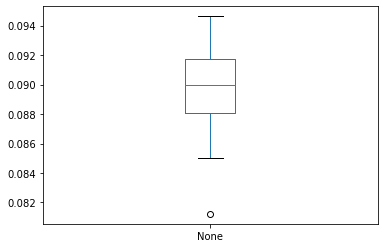

In [51]:
NMAE400 = pd.Series(index=range(0,50))
train_size=400.0
test_size=1000.0
X_features = ['runq-sz', '%%memused','proc/s','cswch/s','all_%%usr','ldavg-1','totsck','pgfree/s','plist-sz','file-nr','idel/s','tps']
for i in range(0, 50):
    # Split X,Y into training set and test set
    train, test1 = train_test_split(XY, test_size = (3600.-train_size)/3600.)
    useless, test2 = train_test_split(test1, test_size = test_size/(3600.-train_size))
    # Split train and test sets into X,Y components
    X_train = train[X_features];X_test = test2[X_features]
    Y_train = train['DispFrames']; Y_test = test2['DispFrames']

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, Y_train)

    # Compute MSE 
    NMAE400[i] = np.mean(np.abs(regr.predict(X_test) - Y_test))/np.mean(Y_test)
    
    
# Show the distribution of the MSE values
NMAE400.plot.box(); 
plt.show()

<ipython-input-52-0e9da7ce59e7>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  NMAE800 = pd.Series(index=range(0,50))


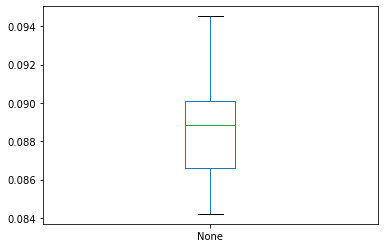

In [52]:
NMAE800 = pd.Series(index=range(0,50))
train_size=800.0
test_size=1000.0
X_features = ['runq-sz', '%%memused','proc/s','cswch/s','all_%%usr','ldavg-1','totsck','pgfree/s','plist-sz','file-nr','idel/s','tps']
for i in range(0, 50):
    # Split X,Y into training set and test set
    train, test1 = train_test_split(XY, test_size = (3600.-train_size)/3600.)
    useless, test2 = train_test_split(test1, test_size = test_size/(3600.-train_size))
    # Split train and test sets into X,Y components
    X_train = train[X_features];X_test = test2[X_features]
    Y_train = train['DispFrames']; Y_test = test2['DispFrames']

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, Y_train)

    # Compute MSE 
    NMAE800[i] = np.mean(np.abs(regr.predict(X_test) - Y_test))/np.mean(Y_test)
    
    
# Show the distribution of the MSE values
NMAE800.plot.box(); 
plt.show()

<ipython-input-53-f554e48bd4cd>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  NMAE1600 = pd.Series(index=range(0,50))


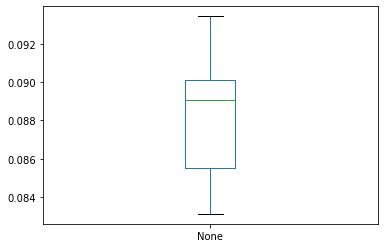

In [53]:
NMAE1600 = pd.Series(index=range(0,50))
train_size=1600.0
test_size=1000.0
X_features = ['runq-sz', '%%memused','proc/s','cswch/s','all_%%usr','ldavg-1','totsck','pgfree/s','plist-sz','file-nr','idel/s','tps']
for i in range(0, 50):
    # Split X,Y into training set and test set
    train, test1 = train_test_split(XY, test_size = (3600.-train_size)/3600.)
    useless, test2 = train_test_split(test1, test_size = test_size/(3600.-train_size))
    # Split train and test sets into X,Y components
    X_train = train[X_features];X_test = test2[X_features]
    Y_train = train['DispFrames']; Y_test = test2['DispFrames']

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, Y_train)

    # Compute MSE 
    NMAE1600[i] = np.mean(np.abs(regr.predict(X_test) - Y_test))/np.mean(Y_test)
    
    
# Show the distribution of the MSE values
NMAE1600.plot.box(); 
plt.show()

<ipython-input-58-be45bc93fa05>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['50', '100', '200', '400', '800', '1600'])


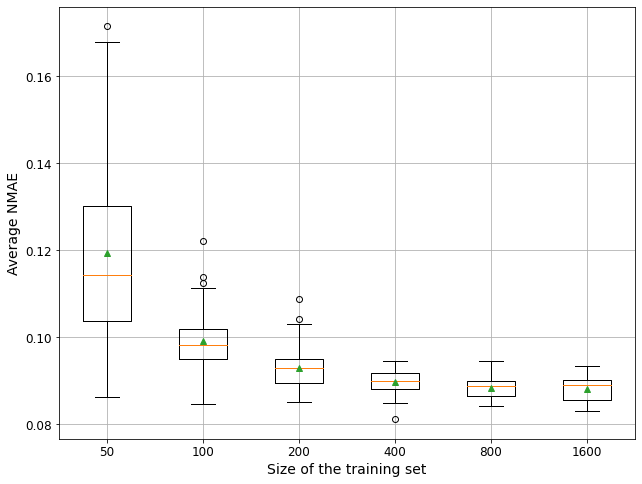

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
error = [NMAE50,NMAE100,NMAE200,NMAE400,NMAE800,NMAE1600]

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_xticklabels(['50', '100', '200', '400', '800', '1600']) 
  # Creating plot 
bp = ax.boxplot(error,showmeans=True) 
  
plt.xlabel('Size of the training set', fontsize=font_size)
plt.ylabel('Average NMAE', fontsize=font_size)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
#plt.tight_layout()
plt.grid()
plt.savefig(r"\kth course\network analytics\project\pic\2.2.1.png",dpi=300,bbox_inches='tight')
plt.show()

<ipython-input-61-effd9610d0f7>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['400','800', '1600'])


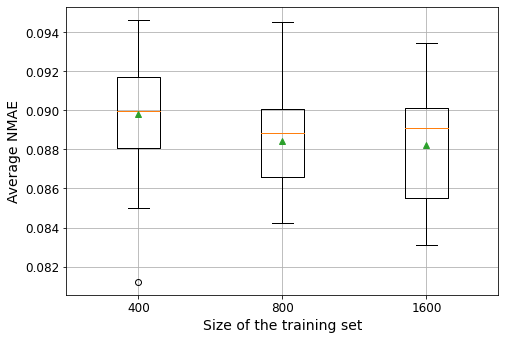

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
error = [NMAE400,NMAE800,NMAE1600]

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_xticklabels(['400','800', '1600'])   
# Creating plot 
bp = ax.boxplot(error,showmeans=True) 
  
plt.xlabel('Size of the training set', fontsize=font_size)
plt.ylabel('Average NMAE', fontsize=font_size)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
plt.grid()
plt.savefig(r"\kth course\network analytics\project\pic\2.2.2.png",dpi=300,bbox_inches='tight')